# Exercise Set 6: Data Structuring 2

*Afternoon, August 14, 2019*

In this Exercise Set we will continue working with the weather data you downloaded and saved in Exercise Set 4. 

> **_Note_**: to solve the bonus exercises in this exerise set you will need to apply the `.groupby()` method a few times. This has not yet been covered in the lectures (you will see it tomorrow).  
>
> `.groupby()` is a method of pandas dataframes, meaning we can call it like so: `data.groupby('colname')`. The method groups your dataset by a specified column, and applies any following changes within each of these groups. For a more detailed explanation see [this link](https://www.tutorialspoint.com/python_pandas/python_pandas_groupby.htm). The [documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html) might also be useful.

First load in the required modules and set up the plotting library:

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

## Exercise Section 6.1: Weather, part 2

This section is the second part of three that analyzes NOAA data. The first part is Exercise Section 4.1, the last part is Exercise Section 7.2.

> **Ex. 6.1.1:** Load the CSV data you stored yesterday as part of Exercise Section 4.1. If you didn't manage to save the CSV file, you can use the code in [this gist](https://gist.github.com/Kristianuruplarsen/be3a14b226fc4c4d7b62c39de70307e4) to load in the NOAA data.

In [2]:
# [Answer to Ex. 6.1.1]
import pandas as pd

url = 'https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/by_year/1864.csv.gz'

df_weather = pd.read_csv(url,
                         compression='gzip',
                         header=None).iloc[:,:4]

df_weather.columns = ['station', 'datetime', 'obs_type', 'obs_value']
df_weather['obs_value'] = df_weather['obs_value'] / 10
df_select = df_weather[(df_weather.station == 'ITE00100550') & (df_weather.obs_type == 'TMAX')].copy()
df_select['TMAX_F'] = 32 + 1.8 * df_select['obs_value']
df_sorted = df_select.reset_index(drop=True).sort_values(by=['obs_value'])

df_sorted.head(10)

,station,datetime,obs_type,obs_value,TMAX_F
16,ITE00100550,18640117,TMAX,-6.3,20.66
17,ITE00100550,18640118,TMAX,-5.0,23.00
13,ITE00100550,18640114,TMAX,-5.0,23.00
12,ITE00100550,18640113,TMAX,-4.3,24.26
14,ITE00100550,18640115,TMAX,-3.1,26.42
2,ITE00100550,18640103,TMAX,-2.8,26.96
15,ITE00100550,18640116,TMAX,-2.5,27.50
11,ITE00100550,18640112,TMAX,-2.5,27.50
4,ITE00100550,18640105,TMAX,-1.9,28.58
41,ITE00100550,18640211,TMAX,-1.8,28.76


> **Ex. 6.1.2:** Convert the date formatted as string to  datetime. Make a new column with the month for each observation.

In [3]:
# [Answer to Ex. 6.1.2]
#df_weather["datetime"].to_datetime()

type(df_sorted["datetime"])

df_sorted["datetime"] = df_sorted["datetime"].astype(str)

df_sorted["datetime"] = pd.to_datetime(df_sorted["datetime"])

print(df_sorted["datetime"].head(3))

df_sorted["month"] = df_sorted["datetime"].dt.month

df_sorted.head(20)

16   1864-01-17
17   1864-01-18
13   1864-01-14
Name: datetime, dtype: datetime64[ns]


,station,datetime,obs_type,obs_value,TMAX_F,month
16,ITE00100550,1864-01-17,TMAX,-6.3,20.66,1
17,ITE00100550,1864-01-18,TMAX,-5.0,23.00,1
13,ITE00100550,1864-01-14,TMAX,-5.0,23.00,1
12,ITE00100550,1864-01-13,TMAX,-4.3,24.26,1
14,ITE00100550,1864-01-15,TMAX,-3.1,26.42,1
2,ITE00100550,1864-01-03,TMAX,-2.8,26.96,1
15,ITE00100550,1864-01-16,TMAX,-2.5,27.50,1
11,ITE00100550,1864-01-12,TMAX,-2.5,27.50,1
4,ITE00100550,1864-01-05,TMAX,-1.9,28.58,1
41,ITE00100550,1864-02-11,TMAX,-1.8,28.76,2


> **Ex. 6.1.3:** Set the datetime variable as temporal index and make a timeseries plot.

> _Hint:_ for this you need to know a few methods of the pandas DataFrames and pandas Series objects. Look up `.set_index()` and `.plot()`. 

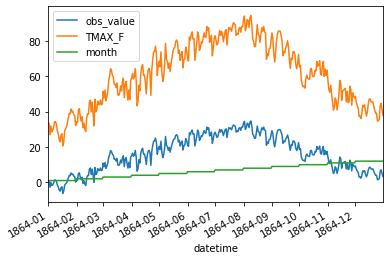

In [4]:
# [Answer to Ex. 6.1.3]
df_sorted = df_sorted.set_index("datetime")

df_sorted.head(10)

df_sorted.plot()

> **Ex. 6.1.4:** Extract the country code from the station name into a separate column.

> _Hint:_ The station column contains a GHCND ID, given to each weather station by NOAA. The format of these ID's is a 2-3 letter country code, followed by a integer identifying the specific station. A simple approach is to assume a fixed length of the country ID. A more complex way would be to use the [`re`](https://docs.python.org/2/library/re.html) module. 

In [25]:
# [Answer to Ex. 6.1.4]
df_sorted["country_code"] = df_sorted["station"].str[:3]
df_sorted.head(10)

,station,obs_type,obs_value,TMAX_F,month,country_code
datetime,,,,,,
1864-01-17,ITE00100550,TMAX,-6.3,20.66,1,ITE
1864-01-18,ITE00100550,TMAX,-5.0,23.00,1,ITE
1864-01-14,ITE00100550,TMAX,-5.0,23.00,1,ITE
1864-01-13,ITE00100550,TMAX,-4.3,24.26,1,ITE
1864-01-15,ITE00100550,TMAX,-3.1,26.42,1,ITE
1864-01-03,ITE00100550,TMAX,-2.8,26.96,1,ITE
1864-01-16,ITE00100550,TMAX,-2.5,27.50,1,ITE
1864-01-12,ITE00100550,TMAX,-2.5,27.50,1,ITE
1864-01-05,ITE00100550,TMAX,-1.9,28.58,1,ITE


> **Ex. 6.1.5:** Make a function that downloads and formats the weather data according to previous exercises in Exercise Section 4.1, 6.1. You should use data for ALL stations but still only select maximal temperature. _Bonus:_ To validate that your function works plot the temperature curve for each country in the same window. Use `plt.legend()` to add a legend. 

,station,obs_type,obs_value,TMAX_F,month,country_code
datetime,,,,,,
1864-02-26,SZ000006717,TMAX,-34.0,-29.20,2,SZ0
1864-02-08,SZ000006717,TMAX,-17.4,0.68,2,SZ0
1864-01-03,SZ000006717,TMAX,-16.5,2.30,1,SZ0
1864-02-10,SZ000006717,TMAX,-15.9,3.38,2,SZ0
1864-02-09,SZ000006717,TMAX,-15.0,5.00,2,SZ0
1864-02-19,SZ000006717,TMAX,-14.7,5.54,2,SZ0
1864-02-05,SZ000006717,TMAX,-14.4,6.08,2,SZ0
1864-02-20,SZ000006717,TMAX,-14.2,6.44,2,SZ0
1864-02-07,SZ000006717,TMAX,-13.8,7.16,2,SZ0


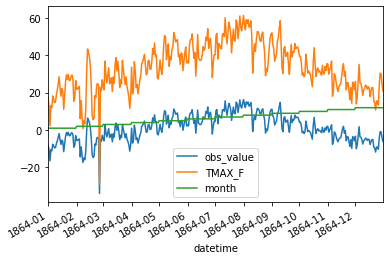

In [37]:
# [Answer to Ex. 6.1.5] for a selected country code

def weather(year,Country_Code):
    url = 'https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/by_year/{}.csv.gz'.format(year)
    df_weather = pd.read_csv(url,
                         compression='gzip',
                         header=None).iloc[:,:4]
    df_weather.columns = ['station', 'datetime', 'obs_type', 'obs_value']
    df_weather['obs_value'] = df_weather['obs_value'] / 10
    df_select = df_weather[(df_weather.station == Country_Code) & (df_weather.obs_type == 'TMAX')].copy()
    df_select['TMAX_F'] = 32 + 1.8 * df_select['obs_value']
    df_sorted = df_select.reset_index(drop=True).sort_values(by=['obs_value'])
    df_sorted["datetime"] = df_sorted["datetime"].astype(str)
    df_sorted["datetime"] = pd.to_datetime(df_sorted["datetime"])
    df_sorted["month"] = df_sorted["datetime"].dt.month
    df_sorted["country_code"] = df_sorted["station"].str[:3]
    df_sorted.head(10)
    df_sorted = df_sorted.set_index("datetime")
    df_sorted.plot()
    return df_sorted.head(10)


weather("1864","SZ000006717")

,station,obs_type,obs_value,TMAX_F,month,country_code
datetime,,,,,,
1864-02-26,SZ000006717,TMAX,-34.0,-29.20,2,SZ0
1864-02-08,SZ000006717,TMAX,-17.4,0.68,2,SZ0
1864-02-17,CA006158350,TMAX,-16.7,1.94,2,CA0
1864-01-03,SZ000006717,TMAX,-16.5,2.30,1,SZ0
1864-01-02,CA006158350,TMAX,-16.1,3.02,1,CA0
1864-02-10,SZ000006717,TMAX,-15.9,3.38,2,SZ0
1864-01-14,EZE00100082,TMAX,-15.1,4.82,1,EZE
1864-02-09,SZ000006717,TMAX,-15.0,5.00,2,SZ0
1864-02-19,SZ000006717,TMAX,-14.7,5.54,2,SZ0


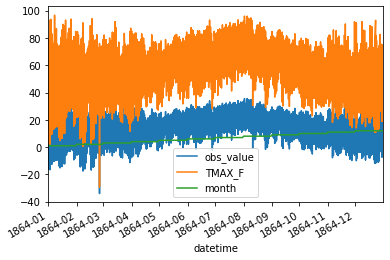

In [38]:
# [Answer to Ex. 6.1.5] for all countries

def weather(year):
    url = 'https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/by_year/{}.csv.gz'.format(year)
    df_weather = pd.read_csv(url,
                         compression='gzip',
                         header=None).iloc[:,:4]
    df_weather.columns = ['station', 'datetime', 'obs_type', 'obs_value']
    df_weather['obs_value'] = df_weather['obs_value'] / 10
    df_select = df_weather[(df_weather.obs_type == 'TMAX')].copy()
    df_select['TMAX_F'] = 32 + 1.8 * df_select['obs_value']
    df_sorted = df_select.reset_index(drop=True).sort_values(by=['obs_value'])
    df_sorted["datetime"] = df_sorted["datetime"].astype(str)
    df_sorted["datetime"] = pd.to_datetime(df_sorted["datetime"])
    df_sorted["month"] = df_sorted["datetime"].dt.month
    df_sorted["country_code"] = df_sorted["station"].str[:3]
    df_sorted.head(10)
    df_sorted = df_sorted.set_index("datetime")
    df_sorted.plot()
    return df_sorted.head(10)


weather("1864")

##  Exercise Section 6.2: 

In this section we will use [this dataset](https://archive.ics.uci.edu/ml/datasets/Adult) from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets.html) to practice some basic operations on pandas dataframes. 


> **Ex. 6.2.1:** This link `'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'` leads to a comma-separated file with income data from a US census. Load the data into a pandas dataframe and show the 25th to 35th row.

> _Hint #1:_ There are no column names in the dataset. Use the list `['age','workclass', 'fnlwgt', 'educ', 'educ_num', 'marital_status', 'occupation','relationship', 'race', 'sex','capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'wage']` as names. 

> _Hint #2:_ When you read in the csv, you might find that pandas includes whitespace in all of the cells. To get around this include the argument `skipinitialspace = True` to `read_csv()`. 

In [48]:
# [Answer to Ex. 6.2.1]
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'

US = pd.read_csv(url, header=None, skipinitialspace=True).iloc[25:36]
US.columns = ['age','workclass', 'fnlwgt', 'educ', 'educ_num', 'marital_status', 'occupation','relationship', 'race', 'sex','capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'wage']
US

,age,workclass,fnlwgt,educ,educ_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage
25,56,Local-gov,216851,Bachelors,13,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,40,United-States,>50K
26,19,Private,168294,HS-grad,9,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K
27,54,?,180211,Some-college,10,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
28,39,Private,367260,HS-grad,9,Divorced,Exec-managerial,Not-in-family,White,Male,0,0,80,United-States,<=50K
29,49,Private,193366,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
30,23,Local-gov,190709,Assoc-acdm,12,Never-married,Protective-serv,Not-in-family,White,Male,0,0,52,United-States,<=50K
31,20,Private,266015,Some-college,10,Never-married,Sales,Own-child,Black,Male,0,0,44,United-States,<=50K
32,45,Private,386940,Bachelors,13,Divorced,Exec-managerial,Own-child,White,Male,0,1408,40,United-States,<=50K
33,30,Federal-gov,59951,Some-college,10,Married-civ-spouse,Adm-clerical,Own-child,White,Male,0,0,40,United-States,<=50K
34,22,State-gov,311512,Some-college,10,Married-civ-spouse,Other-service,Husband,Black,Male,0,0,15,United-States,<=50K


> **Ex. 6.2.2:** What is the missing value sign in this dataset? Replace all missing values with NA's understood by pandas. Then proceed to drop all rows containing any missing values with the  `dropna` method. How many rows are removed in this operation?

> _Hint 1:_ if this doesn't work as expected you might want to take a look at the hint for 6.2.1 again.
 
> _Hint 2:_ The NaN method from NumPy might be useful

In [62]:
# [Answer to Ex. 6.2.2]
import numpy as np

US_na = US.replace("?",np.nan)
US_na = US_na.dropna()
US_na

,age,workclass,fnlwgt,educ,educ_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage
25,56,Local-gov,216851,Bachelors,13,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,40,United-States,>50K
26,19,Private,168294,HS-grad,9,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K
28,39,Private,367260,HS-grad,9,Divorced,Exec-managerial,Not-in-family,White,Male,0,0,80,United-States,<=50K
29,49,Private,193366,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
30,23,Local-gov,190709,Assoc-acdm,12,Never-married,Protective-serv,Not-in-family,White,Male,0,0,52,United-States,<=50K
31,20,Private,266015,Some-college,10,Never-married,Sales,Own-child,Black,Male,0,0,44,United-States,<=50K
32,45,Private,386940,Bachelors,13,Divorced,Exec-managerial,Own-child,White,Male,0,1408,40,United-States,<=50K
33,30,Federal-gov,59951,Some-college,10,Married-civ-spouse,Adm-clerical,Own-child,White,Male,0,0,40,United-States,<=50K
34,22,State-gov,311512,Some-college,10,Married-civ-spouse,Other-service,Husband,Black,Male,0,0,15,United-States,<=50K
35,48,Private,242406,11th,7,Never-married,Machine-op-inspct,Unmarried,White,Male,0,0,40,Puerto-Rico,<=50K


> **Ex. 6.2.3:** (_Bonus_) Is there any evidence of a gender-wage-gap in the data? Create a table showing the percentage of men and women earning more than 50K a year.

In [68]:
# [Answer to Ex. 6.2.3]
US_na["dummy_wage"] = np.where(US_na["wage"] == "<=50K", 1,0)
US_na

,age,workclass,fnlwgt,educ,educ_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage,dummy_wage
25,56,Local-gov,216851,Bachelors,13,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,40,United-States,>50K,0
26,19,Private,168294,HS-grad,9,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K,1
28,39,Private,367260,HS-grad,9,Divorced,Exec-managerial,Not-in-family,White,Male,0,0,80,United-States,<=50K,1
29,49,Private,193366,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K,1
30,23,Local-gov,190709,Assoc-acdm,12,Never-married,Protective-serv,Not-in-family,White,Male,0,0,52,United-States,<=50K,1
31,20,Private,266015,Some-college,10,Never-married,Sales,Own-child,Black,Male,0,0,44,United-States,<=50K,1
32,45,Private,386940,Bachelors,13,Divorced,Exec-managerial,Own-child,White,Male,0,1408,40,United-States,<=50K,1
33,30,Federal-gov,59951,Some-college,10,Married-civ-spouse,Adm-clerical,Own-child,White,Male,0,0,40,United-States,<=50K,1
34,22,State-gov,311512,Some-college,10,Married-civ-spouse,Other-service,Husband,Black,Male,0,0,15,United-States,<=50K,1
35,48,Private,242406,11th,7,Never-married,Machine-op-inspct,Unmarried,White,Male,0,0,40,Puerto-Rico,<=50K,1


> **Ex. 6.2.4:** (_Bonus_) Group the data by years of education (`educ_num`) and marital status. Now plot the share of individuals who earn more than 50K for the two groups 'Divorced' and 'Married-civ-spouse' (normal marriage). Your final result should look like this: 

![](examplefig.png)

> _Hint:_ the `.query()` method is extremely useful for filtering data.

In [74]:
# [Answer to Ex. 6.2.4]
